# Exercice 1 :

## Logistic Regression and Linear SVC 

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

### Create a toy dataset

In [48]:
X, y = make_blobs(n_samples=30, centers=2, random_state=4)

In [49]:
print(X.shape)

(30, 2)


#### Logistic Regression

In [63]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

#### Get coefficients and intercept for the decision line

In [59]:
coef_logreg = logreg.coef_[0]
intercept_logreg = logreg.intercept_

#### Linear SVC

In [60]:
linear_svc = LinearSVC(dual=True, max_iter=10000)  
linear_svc.fit(X, y)

LinearSVC(dual=True, max_iter=10000)

#### Get coefficients and intercept for the decision line

In [64]:
coef_linear_svc = linear_svc.coef_[0]
intercept_linear_svc = linear_svc.intercept_

#### Create figure and subplots

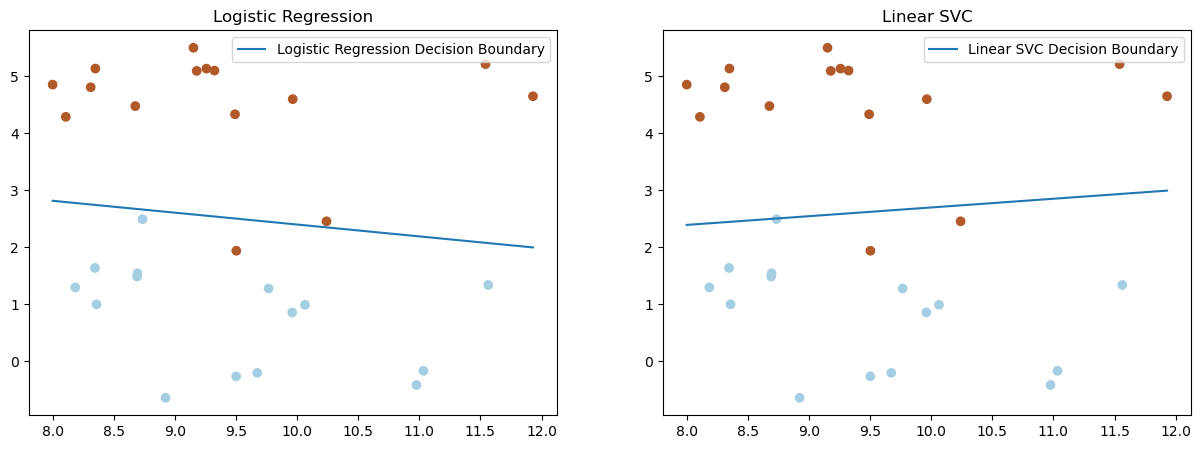

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot points
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot decision line for Logistic Regression
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values_logreg = (-coef_logreg[0] / coef_logreg[1]) * x_values - (intercept_logreg / coef_logreg[1])
axes[0].plot(x_values, y_values_logreg, linestyle='solid', label='Logistic Regression Decision Boundary')
axes[0].set_title('Logistic Regression')
axes[0].legend()

# Plot points
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot decision line for Linear SVC
y_values_linear_svc = (-coef_linear_svc[0] / coef_linear_svc[1]) * x_values - (intercept_linear_svc / coef_linear_svc[1])
axes[1].plot(x_values, y_values_linear_svc, linestyle='solid', label='Linear SVC Decision Boundary')
axes[1].set_title('Linear SVC')
axes[1].legend()

plt.show()


#### print the classification score

In [55]:
score_logreg = logreg.score(X, y)
score_linear_svc = linear_svc.score(X, y)

In [56]:
print(f"Logistic Regression Classification Score: {score_logreg}")

Logistic Regression Classification Score: 0.9666666666666667


In [57]:
print(f"Linear SVC Classification Score: {score_linear_svc}")

Linear SVC Classification Score: 0.9333333333333333


# Exercice 2:

#### Values of C to try


In [75]:
C_values = [0.01, 1.0, 100.0]

#### Create figure and subplots

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


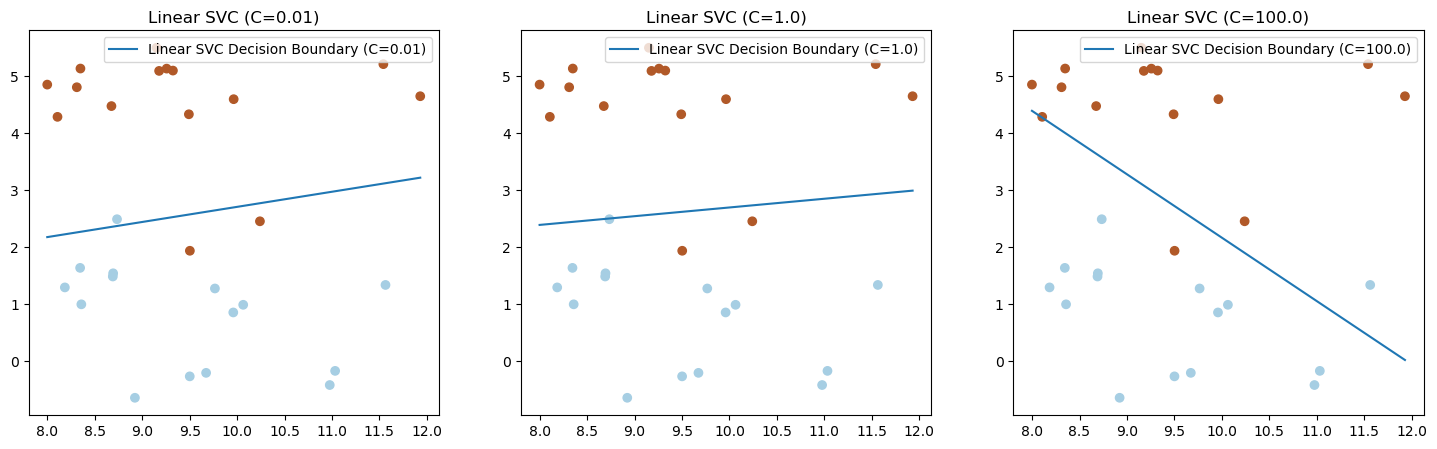

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, C in enumerate(C_values):
    # Linear SVC with different C values
    linear_svc = LinearSVC(C=C, dual=True, max_iter=10000)
    linear_svc.fit(X, y)

    coef_linear_svc = linear_svc.coef_[0]
    intercept_linear_svc = linear_svc.intercept_

    # Plot points
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # Plot decision line for Linear SVC with different C values
    y_values_linear_svc = (-coef_linear_svc[0] / coef_linear_svc[1]) * x_values - (
            intercept_linear_svc / coef_linear_svc[1])
    axes[i].plot(x_values, y_values_linear_svc, linestyle='solid',
                 label=f'Linear SVC Decision Boundary (C={C})')
    axes[i].set_title(f'Linear SVC (C={C})')
    axes[i].legend()

#### Create toy dataset with noise

In [123]:
X_noisy, y_noisy = make_blobs(n_samples=30, centers=2, random_state=4, cluster_std=5)

#### Calculate x_values based on the features of X_noisy

In [141]:
x_values = np.linspace(X_noisy[:, 0].min(), X_noisy[:, 0].max(), 100)
y_values_logreg = (-coef_logreg[0] / coef_logreg[1]) * x_values - (intercept_logreg / coef_logreg[1])

#### Create figure and subplots

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


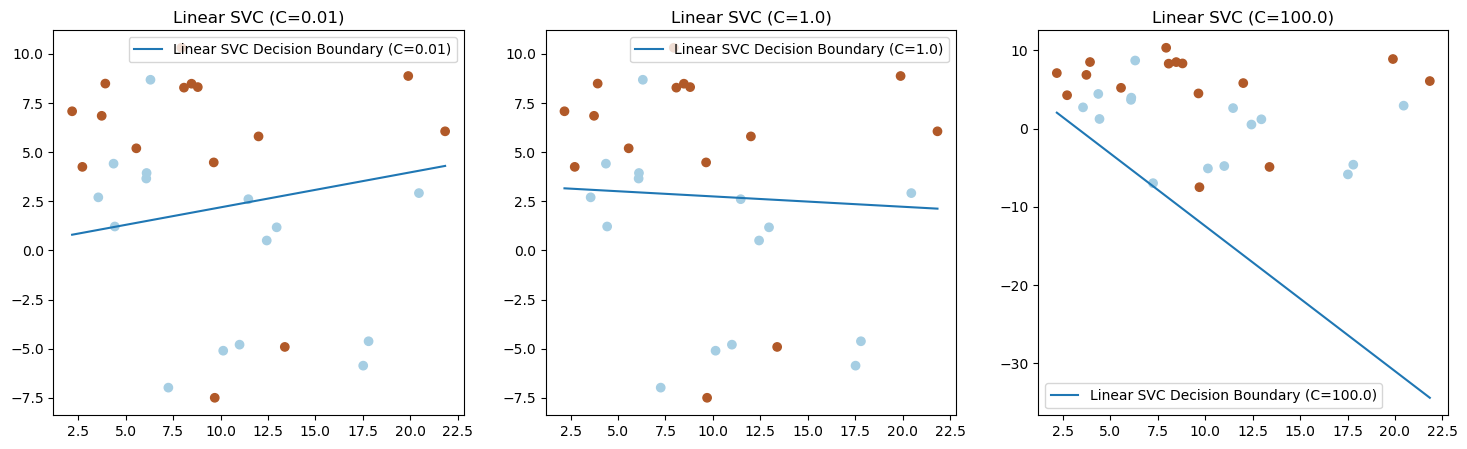

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, C in enumerate(C_values):
    # Linear SVC with different C values
    linear_svc = LinearSVC(C=C,dual=True, max_iter=10000)
    linear_svc.fit(X_noisy, y_noisy)

    # Get coefficients and intercept for the decision line
    coef_linear_svc = linear_svc.coef_[0]
    intercept_linear_svc = linear_svc.intercept_

    # Plot points
    axes[i].scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap=plt.cm.Paired)

    # Plot decision line for Linear SVC with different C values
    y_values_linear_svc = (-coef_linear_svc[0] / coef_linear_svc[1]) * x_values - (
            intercept_linear_svc / coef_linear_svc[1])
    axes[i].plot(x_values, y_values_linear_svc, linestyle='solid',
                 label=f'Linear SVC Decision Boundary (C={C})')
    axes[i].set_title(f'Linear SVC (C={C})')
    axes[i].legend()


Lorsque C est petit (par exemple, 0.01), le modèle est plus tolérant envers les erreurs d'entraînement, ce qui signifie qu'il permettra une marge plus large, même si certaines données d'entraînement ne sont pas correctement classifiées. Cela peut conduire à une sous-ajustement (underfitting) car le modèle peut ne pas capturer la complexité des données.

Lorsque C augmente (par exemple, 1.0), le modèle devient moins tolérant envers les erreurs d'entraînement et essaie de minimiser le nombre d'erreurs. Cela peut conduire à une marge plus étroite, adaptée de manière plus précise aux données d'entraînement.

Lorsque C devient très grand (par exemple, 100.0), le modèle devient trop rigide et peut commencer à surajuster (overfitting) les données d'entraînement. Il peut capturer le bruit dans les données et ne généraliserait pas bien à de nouvelles données.

# Exercice 3:

#### Create a non-linearly separable toy dataset


In [110]:
X, y = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=2)

#### Keep only 2 classes by assigning modulo 2 to the target values

In [111]:
y = y % 2

#### Plot scatter plot to observe non-linear separability

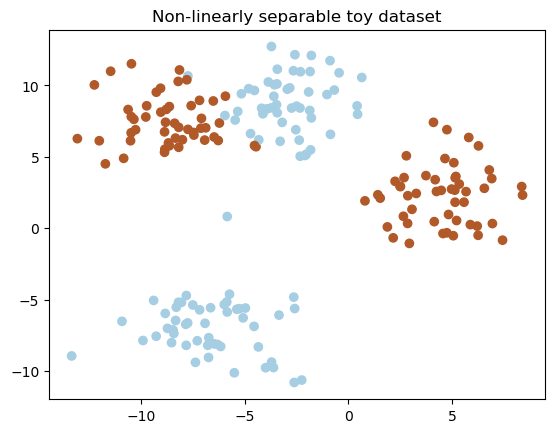

In [122]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Non-linearly separable toy dataset')
plt.show()

#### Split the dataset into training and testing sets


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### train linear SVC

In [113]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_score = linear_svc.score(X_train, y_train)

#### train polynomial SVC

In [114]:
poly_svc = SVC(kernel='poly', degree=3)  
poly_svc.fit(X_train, y_train)
poly_score = poly_svc.score(X_train, y_train)

#### Train RBF (Gaussian) SVC

In [115]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_score = rbf_svc.score(X_train, y_train)

#### Print training scores

In [116]:
print(f"Linear SVC Training Score: {linear_score}")
print(f"Polynomial SVC Training Score: {poly_score}")
print(f"RBF (Gaussian) SVC Training Score: {rbf_score}")

Linear SVC Training Score: 0.75
Polynomial SVC Training Score: 0.9071428571428571
RBF (Gaussian) SVC Training Score: 0.9714285714285714


- The linear SVM has the lowest training accuracy, indicating that the data might not be well-separated by a linear boundary. This could be the case if the relationship between features and classes is more complex.

- The polynomial SVM, with a higher training accuracy, suggests that the data might have a non-linear relationship, and using a polynomial kernel helps capture this non-linearity. However, the accuracy is not as high as the RBF kernel.

- The RBF (Gaussian) SVM achieved the highest training accuracy, suggesting that the RBF kernel is better suited to capture the underlying patterns in the data. The RBF kernel is more flexible and can capture non-linear relationships effectively.

#### Plot decision boundaries manually

In [119]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Create meshgrid for decision boundaries


In [120]:
Z_linear = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_poly = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

Z_rbf = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

#### Plot decision boundaries

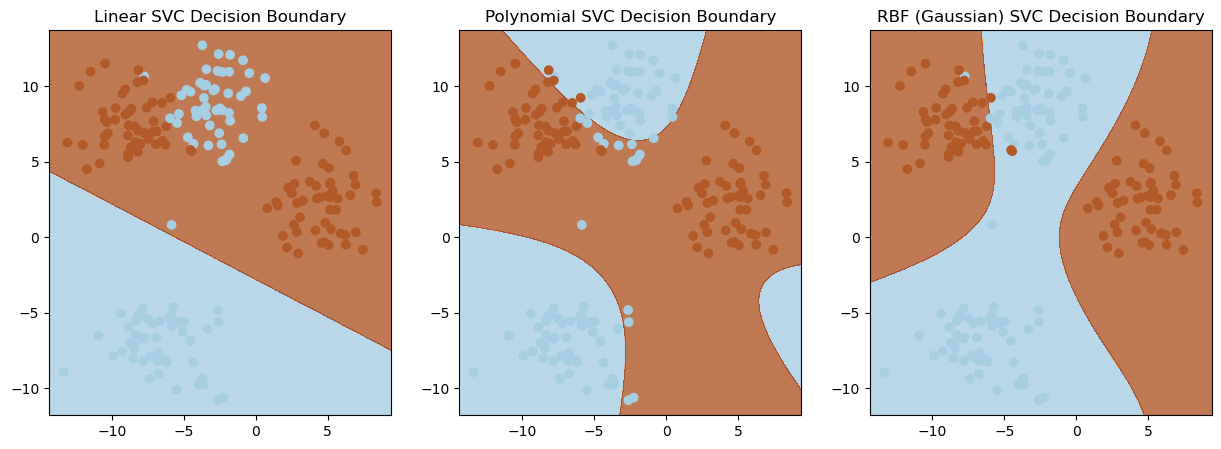

In [121]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear SVC Decision Boundary')

plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Polynomial SVC Decision Boundary')

plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('RBF (Gaussian) SVC Decision Boundary')

plt.show()


# Exercice 4:

#### Create a tpy regression dataset

In [132]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=1, random_state=42)

#### Split the dataset into training and testing sets 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Linear Regression

In [128]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_train_score = linear_reg.score(X_train, y_train)
linear_test_score = linear_reg.score(X_test, y_test)

In [133]:
print("Linear Regression:")
print(f"Training Score: {linear_train_score}")
print(f"Testing Score: {linear_test_score}")

Linear Regression:
Training Score: 0.9999664015938775
Testing Score: 0.999965185981934


#### Train Lasso Regression

In [129]:
lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train, y_train)
lasso_train_score = lasso_reg.score(X_train, y_train)
lasso_test_score = lasso_reg.score(X_test, y_test)

In [135]:
print("\nLasso Regression:")
print(f"Training Score: {lasso_train_score}")
print(f"Testing Score: {lasso_test_score}")


Lasso Regression:
Training Score: 0.999554839987303
Testing Score: 0.9995663901712265


#### Train Ridge Regression

In [130]:
ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)
ridge_train_score = ridge_reg.score(X_train, y_train)
ridge_test_score = ridge_reg.score(X_test, y_test)

In [136]:
print("\nRidge Regression:")
print(f"Training Score: {ridge_train_score}")
print(f"Testing Score: {ridge_test_score}")



Ridge Regression:
Training Score: 0.9999645946537099
Testing Score: 0.9999614292091868


#### In terms of both training and testing scores, Linear Regression and Ridge Regression perform slightly better than Lasso Regression. The differences in scores are very small, indicating that all three models fit the data extremely well.

#### Vary alpha for Lasso Regression

In [137]:
alphas = [0.1, 1, 10]

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    train_score = lasso_reg.score(X_train, y_train)
    test_score = lasso_reg.score(X_test, y_test)
    print(f"\nLasso Regression (alpha={alpha}):")
    print(f"Training Score: {train_score}")
    print(f"Testing Score: {test_score}")



Lasso Regression (alpha=0.1):
Training Score: 0.9999580030882229
Testing Score: 0.9999617322171958

Lasso Regression (alpha=1):
Training Score: 0.999554839987303
Testing Score: 0.9995663901712265

Lasso Regression (alpha=10):
Training Score: 0.964872449350995
Testing Score: 0.9674075243237121
